Investigate the training segmentation

Save individual segments as separate .wav files

Baseline? Run classification on matched subjects using sentences data. 

In [1]:
#%matplotlib notebook
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
from scipy.io import wavfile

In [2]:
subject = "R040"
n = 1
sample_rate, speech_sample = wavfile.read('data/audio/%s/s1_%02d.wav'%(subject, n))

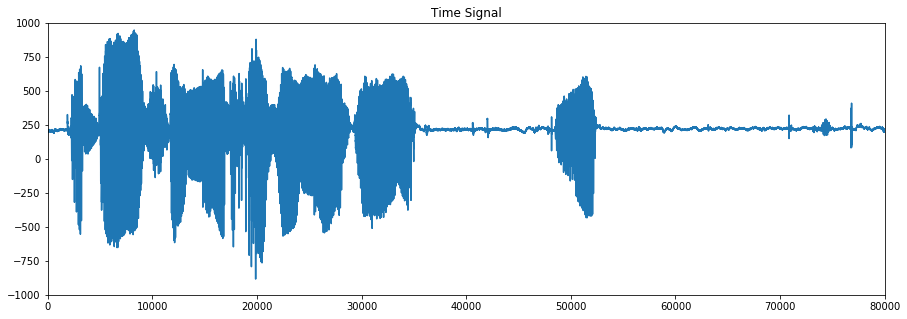

In [3]:
plt.figure(figsize=(15,5))
plt.plot(speech_sample)
plt.xlim([0, 80000])
plt.ylim([-1000, 1000])
plt.title('Time Signal')
plt.show()

ipd.Audio('data/audio/%s/s1_%02d.wav'%(subject, n)) # load a local WAV file

In [4]:
i_start = []
text   = []
with open('ctm/test/ctm', 'r') as file1:
    for line in file1:
        utt_id = line.split(' ')[0]
        rep = int(utt_id.split('_')[2])
        
        if rep == n:
            bt     = float(line.split(' ')[2])
            dur    = float(line.split(' ')[3])
            word   = line.split(' ')[4]
            
            i_start.append(bt)
            text.append(word)
#             print("Utterance ID: %s"%utt_id)
#             print("Repetition: %d"%rep)
#             print("Begin Time: %f"%bt)       
#             print("Duration: %f"%dur)
#             print(word)
            
print(i_start)
print(text)

[0.0, 0.39, 0.55, 1.79, 2.02, 2.66, 3.71]
['the', 'dew', 'shimmered', 'again', 'shell', 'again', 'shell']


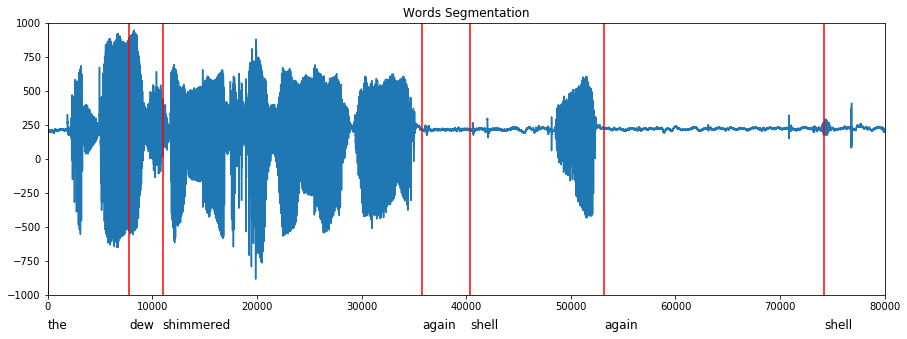

In [5]:
plt.figure(figsize=(15,5))
plt.plot(speech_sample)
plt.xlim([0, 80000])
plt.ylim([-1000, 1000])
for i,w in zip(i_start,text):
    plt.axvline(x=i*sample_rate, color='r')
    plt.text(i*sample_rate, -1250, w, size='large')
    
plt.title('Words Segmentation')
plt.show()